## Installing and Importing the Right Packages Into Our Code ##

In [139]:
!pip install yfinance #Installs the "yfinance" package. This is an API from where we can get all our stocks and market-
#related data from. 
!pip install matplotlib #For better time series visualization
!pip install numpy #Great package for working with arrays, which is how many of our columns and the data for 
#those columns may be represented. 
!pip install pandas #A package specialized in working with dataframes


[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [117]:
import yfinance as yf #Importing the necessary packages into our script. 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

## Importing our Two Datasets/Time Series Data ##

When it comes to the application of conditional volatility, conditional volatility is often used to see whether any one investment (such as a specific stock or a specific market) is riskier to invest in than some other stock/market. When one stock is in fact riskier to invest in than another stock, you usually notice two things about particularly the "riskier" stock:

1) The riskier stock's returns, when plotted, will tend to fluctuate more. Remember, volatility is simply the standard deviation of returns. The more that returns fluctuate, the more they *deviate* from their most common/average value.
   
2) Because the riskier's stocks returns should fluctuate more visually, its average volatility should also be higher than the average volatility of the less riskier stock to invest in. Now, the reason we say average is because there may be times when the riskier stock may has a lower conditional volatility value than the more "safer" stock to invest in. But, when it comes to really assesssing the risk of an investment, you have look at that investment from more a broad, *general* perspective; it's not about which stock's volatility is greater at any one specific point in time but rather which stock's volatility has been *generally* greater over a *period* time.

So, given this, let's then put it to test. In this article, we are going at look two industries in the United States: the housing industry and the technology industry. And we are going to estimate the historical volatilities of both industries. But, when it comes to stocks, there is no one stock that represents solely the industrial parts of the U.S. economy, and there is no stock that represents the housing industry in the U.S. economy. However, there are stocks that are very stronlgy associated with each of these industries, so those are the stocks that we will work with here. Here they are:

1) The **Ishares U.S. Real Estate Exchange-Traded Funds** (Ticker: "IYR"):
2) The **Technology Select Sector SPDR Fund** (Ticker: "XLK")

Note that tickers are just another way to refer to the stock in the stock market without having to always refer to it by its full name. 

In [118]:
#Importing our data. 
iyr = yf.download("IYR", start = "2022-01-01", end = "2024-02-11") #Imports the "IYR" data from 
#Janauary 1st, 2022 to February 11th, 2024, the date of writing this article.
#
xlk = yf.download("XLK", start = "2022-01-01", end = "2024-02-11") #Importing the historical data of prices
#of the "XLX" stock from over that same time frame. 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Plotting Both Stocks ##

Text(0, 0.5, 'Price in thousands of dollars')

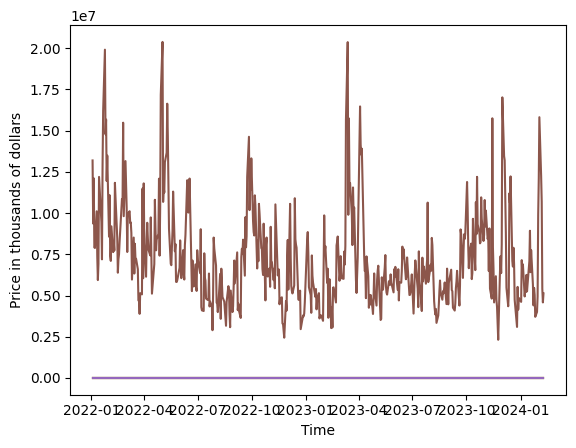

In [119]:
plt.plot(iyr) #Visualizes our "IYR" stock. The default for our y-axis is the closing price of our market on that
#day. 
plt.xlabel("Time") #Labels our x-axis
plt.ylabel("Price in thousands of dollars") #Adds our y-axis. 

Text(0, 0.5, 'Price in thousands of dollars')

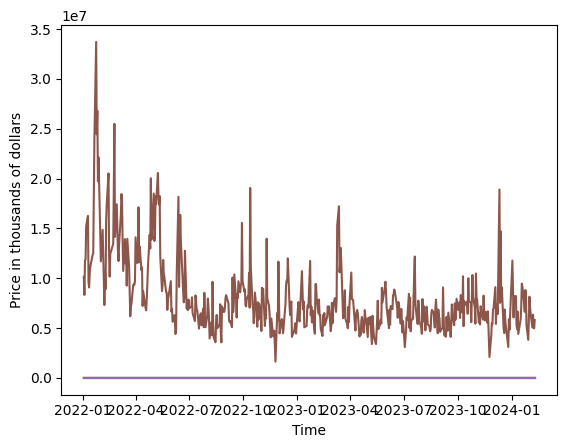

In [120]:
plt.plot(xlk) #Visualizes our Dow Jones Industrial Average's prices over time. 
#Once again, the default for our y-axis is the closing price of the "DJI" on that respective day. 
plt.xlabel("Time") #Labels our x-axis
plt.ylabel("Price in thousands of dollars") #Adds our y-axis. 

## Calculating Returns For Each Stock ## 

In [121]:
print(type(iyr)) #Prints the class of our imported "IYR" data, which should be a dataframe. Our "dji" 
#dataset should have the same class. 
iyr.columns #Prints the column names of our "iyr" dataframe, which too would be the same for our "dji" dataset. 

<class 'pandas.core.frame.DataFrame'>


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [122]:
iyr["Returns"] = iyr["Adj Close"].pct_change() * 100 #Calculates the percentage change in the adjusted closing prices
#of "IYR" stock and, by multiplying by 100, expresses that decimal into a percentage value. Remember, all that returns
#are is merely a calculation of percentage change between the closing price of a stock today and its closing price yesterday.
#
iyr["Returns"] #Visualizes our calculated "Returns" column. Notice that the first day has a NaN (or missing value). That
#is because, for the first day, there is no day before from which a percentage change calculation can be made in Python. 

Date
2022-01-03         NaN
2022-01-04   -0.190866
2022-01-05   -2.964203
2022-01-06   -0.017905
2022-01-07   -0.671968
                ...   
2024-02-05   -2.031919
2024-02-06    1.382705
2024-02-07   -0.023112
2024-02-08    0.693640
2024-02-09    0.057409
Name: Returns, Length: 529, dtype: float64

In [123]:
#Because our first value has a missing value, let's just drop it. 
iyr = iyr.drop(iyr.index[0]) #Drops the first row from our "iyr" dataframe, which should indirectly also drop the
#first row of our "Returns" column (which is a missing value). 
iyr["Returns"] #Now let's take a look at our "Returns" column for our "IYR" stock.

Date
2022-01-04   -0.190866
2022-01-05   -2.964203
2022-01-06   -0.017905
2022-01-07   -0.671968
2022-01-10   -0.505147
                ...   
2024-02-05   -2.031919
2024-02-06    1.382705
2024-02-07   -0.023112
2024-02-08    0.693640
2024-02-09    0.057409
Name: Returns, Length: 528, dtype: float64

### Doing the same for our "xlk" dataset: ### 

In [124]:
print(type(xlk)) #Notice how the outputs are the same. Hopefully, this may help to see what types of data is 
#really extracted from yfinance for any specific stock. 
xlk.columns 

<class 'pandas.core.frame.DataFrame'>


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [125]:
xlk["Returns"] = xlk["Adj Close"].pct_change() * 100 #Calculates the returns (as a percent) of our "XLK" stock
#over time. 
xlk = xlk.drop(xlk.index[0]) #Drops the first row of our "xlk" dataframe, from which we can drop the first row in our "Returns"
#column (which once again is missing). Note, that in dropping a row, we ARE losing a day. But, because we have so much data 
#from so many days, that loss of data for one day is something that, on the larger scale, won't make much of a difference. 

## Plotting our Returns for the "XLK" and the "IYR" ##

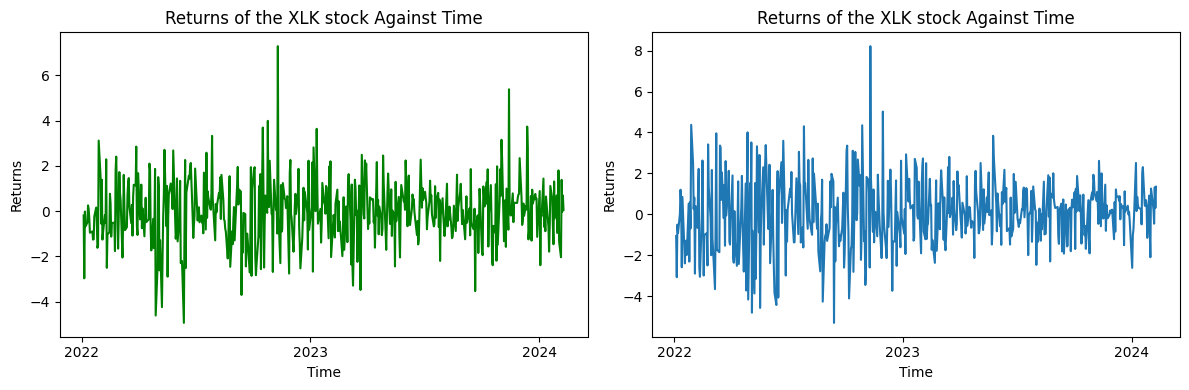

In [131]:
fig1, axs1 = plt.subplots(1, 2, figsize = (12, 4)) #Helps to plot two figures side by side, each with a width of 12 and a height of 4. 
#
#Plotting "IYR" Returns
axs1[0].plot(iyr.index, iyr["Returns"], color = "green", alpha = 1)
axs1[0].set_xlabel("Time") 
axs1[0].set_ylabel("Returns")
axs1[0].set_title("Returns of the XLK stock Against Time")
axs1[0].xaxis.set_major_locator(YearLocator()) #Instead of our x-axis displaying a large amount of individual date values,
#which can get messy visually, we tell Python to show year-values on the x-axis, which looks a bit more cleaner. 
#
#Plotting "DJI" Returns
axs1[1].plot(xlk.index, xlk["Returns"])
axs1[1].set_xlabel("Time")
axs1[1].set_ylabel("Returns")
axs1[1].set_title("Returns of the XLK stock Against Time")
axs1[1].xaxis.set_major_locator(YearLocator())
#
plt.tight_layout()

Notice how the returns of the "XLK" have tended to be historically higher than the "IYR" stock.  

## Calculating Volatilities Using a Rolling Window ##

To calculate volatility here, we use a rolling window, which essentially allows us to have volatility at different times (rather than one standard deviation calculation for all our "Returns" data). Remember, we want to *plot* volatility to see how it may change with time, so we need multiple volatility values (each of which is one data point). Using a rolling window to calculate values such as volatility is actually farily common in Quantitative Finance. It may help to read more about rolling volatility.

In [132]:
iyr["Volatility"] = iyr["Returns"].rolling(window = 5).std() #Standard deviation of our Returns is our volatility. 
iyr["Volatility"] = iyr["Volatility"].dropna() #Drops first four rows (which now hold missing values because we used a rolling volatility). 

In [133]:
xlk["Volatility"] = xlk["Returns"].rolling(window = 5).std() #Same thing as we did for our "iyr" data. 
xlk["Volatility"] = xlk["Volatility"].dropna() 

Average Conditional Volatility for IYR:  1.266939374863388
Average Conditional Volatility for XLK:  1.5156978997486237


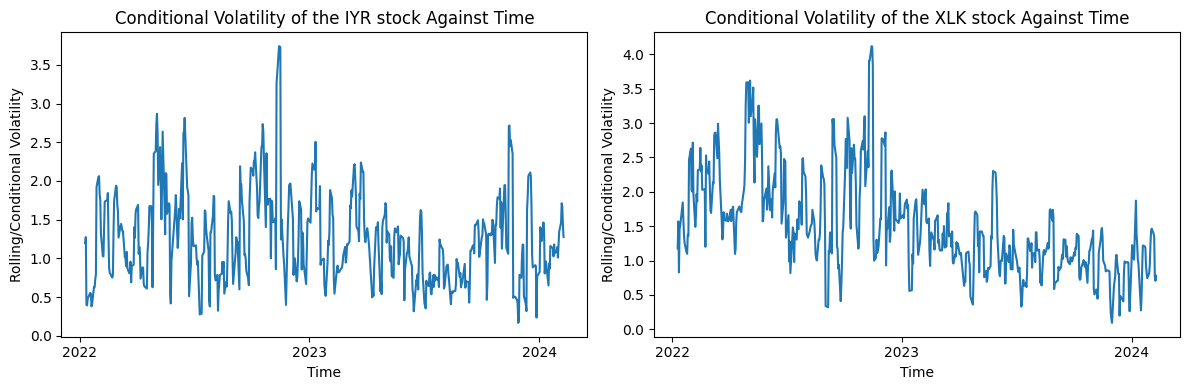

In [134]:
from matplotlib.dates import YearLocator
fig2, axs2 = plt.subplots(1, 2, figsize = (12, 4)) 
#
print("Average Conditional Volatility for IYR: ", iyr["Volatility"].mean()) #Calculates and prints 
#the mean, or average, conditional volatility of our "IYR" stock. 
print("Average Conditional Volatility for XLK: ", xlk["Volatility"].mean()) #Calculates and prints 
#the mean, or average, conditional volatility of the "DJI". 
#
#Plotting "IYR" Returns
axs2[0].plot(iyr.index, iyr["Volatility"])
axs2[0].set_xlabel("Time") 
axs2[0].set_ylabel("Rolling/Conditional Volatility")
axs2[0].set_title("Conditional Volatility of the IYR stock Against Time")
axs2[0].xaxis.set_major_locator(YearLocator())  
#
#Plotting "DJI" Returns
axs2[1].plot(xlk.index, xlk["Volatility"])
axs2[1].set_xlabel("Time")
axs2[1].set_ylabel("Rolling/Conditional Volatility")
axs2[1].set_title("Conditional Volatility of the XLK stock Against Time")
axs2[1].xaxis.set_major_locator(YearLocator())
#
plt.tight_layout() #Prevents the overlap of text between our two plots. 

So, based on our Conditional Volatility Analysis, our reports indicate that investing in the "XLK" stock, or the Technology Select Sector SPDR Fund, from 2022 to 2024 tended to be riskier than investing in the "IYR" stock, or the Ishares U.S. Real Estate Exchange-Traded Funds. The calculated average conditional volatility for the "XLK" stock from 2022 to 2024 was greater than that of the "IYR" stock from over the same time frame. From a more visual lens, we can see that, from 2022 to 2023, the conditional volatility for the "XLK" stock fluctuated largerly within the 2.5 to 4.0 range, while the conditional volatility of the "IYR" stock fluctuated largely within the 0.5 to 3.0 range. However, notice that past 2023 and into 2024, the conditional volatility values for the "XLK" stock dropped to within the 0.5 to 2.0 range, which could mean that perhaps that stock (over this past year) has became a little bit more safer of an investment. 

Now, in terms of how each of these stocks relate to their respective industries, the very fact that the average conditional volatility for the "XLK" from 2022 to 2023 was higher than that of the IYR from over the same time range tells us that,  *perhaps*, the technology sector in the U.S. may have been more riskier to invest in than the industrial sector over this time period. 

But the fact that the conditional volatility values of the "XLK" stock dropped after 2023 may mean that the average conditional volatility value that we calculated for the "XLK" stock from 2022 to 2024 may be skewed. Simply put, the conditional volatilitiy values of the "XLK" stock could have unusually high (out of its normal range) from 2022 to 2023. To really see if the "XLK" is riskier to invest in than the "IYR", it may help to study the conditional volatilties between the two stocks from only 2023 to 2024 and, then, see whether those results align with the ones we just obtained. After all, to really confidently determine if one industry/stock is safer to invest in than other, you need to look at conditional volatilites over different time periods, alongside other charactersitics of both stocks/industries. Yes, looking at conditional volatility may *indicate* whether one stock is riskier to invest in than other, but it will never guarentee it. That is why Quantitative Finance is the complicated field that it is. To reach some conclusions, you sometimes have to look at *everything*. 

In [141]:
<iframe src="Conditional_Volatility.html" width="100%" height="600px" frameborder="0" scrolling="no"></iframe>

SyntaxError: invalid syntax (3757191467.py, line 1)